## Plots from the Paper

In [2]:
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14.
mpl.rcParams["axes.labelsize"] = 12.
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['font.sans-serif'] = "Arial"

cm = 1/2.54  # centimeters in inches

Interpretation: The more you control the stream statistics, the more the PRI depends on the controls of the Lexicon.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from arpac import to_lexicon
from arpac import load_words
from arpac.core.word import word_overlap_matrix
import numpy as np

tp_modes = ["TP-random position-random", "TP-random position-fixed", "TP-structured"]
tp_modes_pretty = ["TP-random", "TP-position", "TP-structured"]

lexicon = load_words("results/default_english_2025-02-28_17-23-18/_arpac/lexicon_0.json")
print(lexicon)
overlap = word_overlap_matrix(lexicon, control_features=["son"])
int(np.triu(overlap, 1).sum())

biːʃɔːhuː|dɔːfɜːɲɑː|kɔːmɑːʃiː|hiːθɜːpɜː


1

In [4]:
df = pd.read_csv("results/analysis_full_dataset.csv").replace(tp_modes, tp_modes_pretty)
df[(df["Control"] == "Reference lexicons (Literature)") & (df["Cum_Feat_Rep"] == 0)]

,Unnamed: 0,Control,Lexicon,Cum_Feat_Rep,Feature,PRI,Stream TP mode,Stream
91326,91326,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_1_son,0.044974,TP-position,lu|be|du|pa|ne|ri|xi|so|la|di|fa|ka|pa|fa|du|x...
91327,91327,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_1_back,0.005291,TP-position,lu|be|du|pa|ne|ri|xi|so|la|di|fa|ka|pa|fa|du|x...
91328,91328,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_1_hi,0.005291,TP-position,lu|be|du|pa|ne|ri|xi|so|la|di|fa|ka|pa|fa|du|x...
91329,91329,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_1_lab,0.079365,TP-position,lu|be|du|pa|ne|ri|xi|so|la|di|fa|ka|pa|fa|du|x...
91330,91330,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_1_cor,0.026455,TP-position,lu|be|du|pa|ne|ri|xi|so|la|di|fa|ka|pa|fa|du|x...
...,...,...,...,...,...,...,...,...
92281,92281,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_2_lo,0.039683,TP-structured,lu|fa|ri|xi|so|du|di|ne|ka|pa|be|la|xi|so|du|p...
92282,92282,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_2_lab,0.000000,TP-structured,lu|fa|ri|xi|so|du|di|ne|ka|pa|be|la|xi|so|du|p...
92283,92283,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_2_tense,0.000000,TP-structured,lu|fa|ri|xi|so|du|di|ne|ka|pa|be|la|xi|so|du|p...
92284,92284,Reference lexicons (Literature),pabela|dineka|lufari|xisodu,0,phon_2_long,0.000000,TP-structured,lu|fa|ri|xi|so|du|di|ne|ka|pa|be|la|xi|so|du|p...


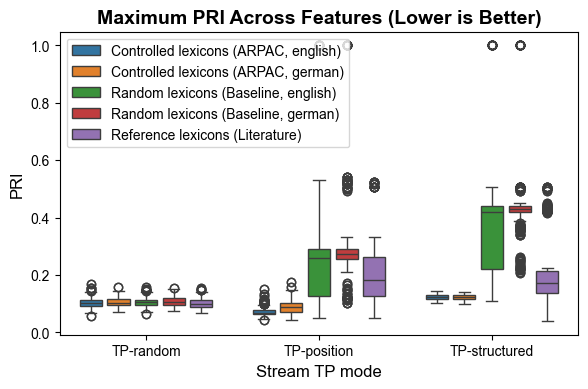

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

tp_modes = ["TP-random position-random", "TP-random position-fixed", "TP-structured"]
tp_modes_pretty = ["TP-random", "TP-position", "TP-structured"]

df = pd.read_csv("results/analysis_full_dataset.csv").replace(tp_modes, tp_modes_pretty)

_, ax = plt.subplots(figsize=(17*cm, 10*cm))
sns.boxplot(df[df["Feature"] == "max"], x="Stream TP mode", y="PRI", hue="Control", order=tp_modes_pretty, gap=0.2)
plt.title("Maximum PRI Across Features (Lower is Better)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

os.makedirs("results", exist_ok=True)
plt.savefig(os.path.join("results", "lexicon_pris_summary.pdf"), dpi=600)

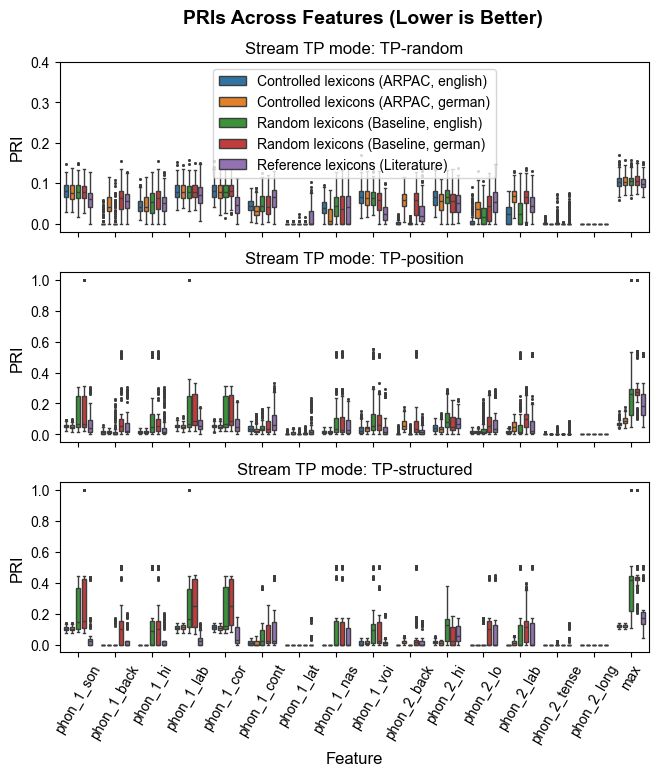

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    sns.boxplot(df[df["Stream TP mode"] == tp_mode], x="Feature", y="PRI", hue="Control", ax=axs[i], fliersize=1, gap=0.3)
    axs[i].set_title(f"Stream TP mode: {tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
locs, labls = plt.xticks()
plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"PRIs Across Features (Lower is Better)", weight="bold", size=14, x=0.55)
plt.savefig("results/lexicon_pri_all.pdf", dpi=600)

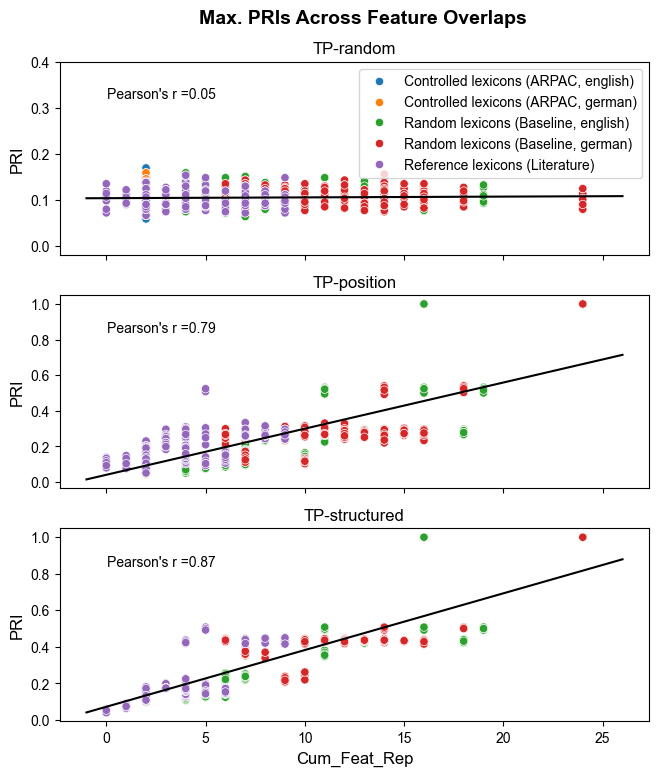

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    x_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]["Cum_Feat_Rep"]
    y_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]["PRI"]
    sns.scatterplot(data=df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")], x="Cum_Feat_Rep", y="PRI", ax=axs[i], hue="Control") # & ((df["Control"] == "Reference lexicons (Literature)"))
    axs[i].set_title(f"{tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
    
    r, p = sp.stats.pearsonr(x=x_data, y=y_data)
    axs[i].text(.05, .8*axs[i].get_ylim()[1], "Pearson's r ={:.2f}".format(r), zorder=100)
    m, b = np.polyfit(x_data, y_data, 1)
    X_plot = np.linspace(-1,26,100)
    axs[i].plot(X_plot, m*X_plot + b, '-', color="black")
locs, labls = plt.xticks()
#plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"Max. PRIs Across Feature Overlaps", weight="bold", size=14, x=0.55)
plt.savefig("results/pri_corr_colored.pdf", dpi=600)

/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_8382/3167195573.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend(handles=handles, labels=labels)


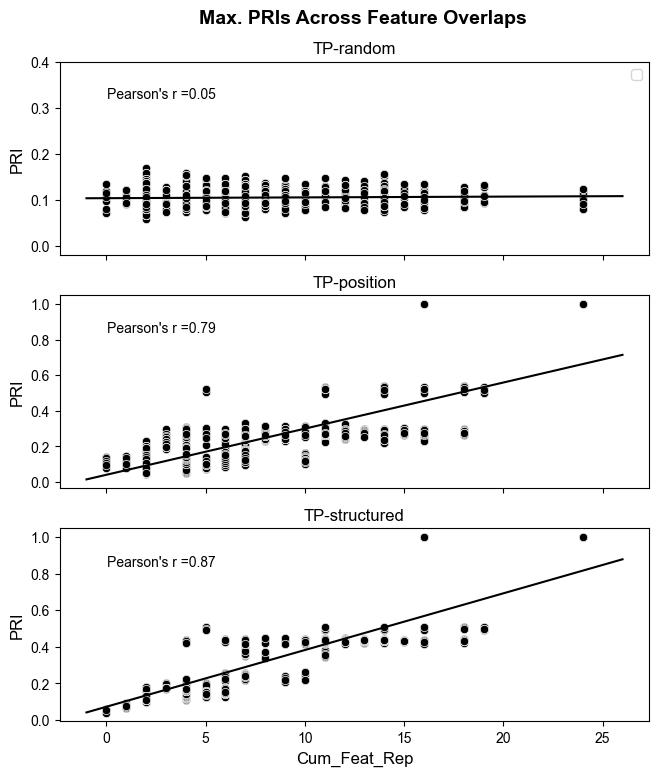

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    x_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]["Cum_Feat_Rep"]
    y_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]["PRI"]
    sns.scatterplot(data=df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")], x="Cum_Feat_Rep", y="PRI", ax=axs[i], color="black") #, hue="Control") # & ((df["Control"] == "Reference lexicons (Literature)"))
    axs[i].set_title(f"{tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        #sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)

    r, p = sp.stats.pearsonr(x=x_data, y=y_data)
    axs[i].text(.05, .8*axs[i].get_ylim()[1], "Pearson's r ={:.2f}".format(r), zorder=100)
    m, b = np.polyfit(x_data, y_data, 1)
    X_plot = np.linspace(-1,26,100)
    axs[i].plot(X_plot, m*X_plot + b, '-', color="black")
locs, labls = plt.xticks()
#plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"Max. PRIs Across Feature Overlaps", weight="bold", size=14, x=0.55)
plt.savefig("results/pri_corr_black.pdf", dpi=600)

/var/folders/n1/bxdrmv296493f6tbg9v8pjnh0000gn/T/ipykernel_8382/1221016858.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend(handles=handles, labels=labels)


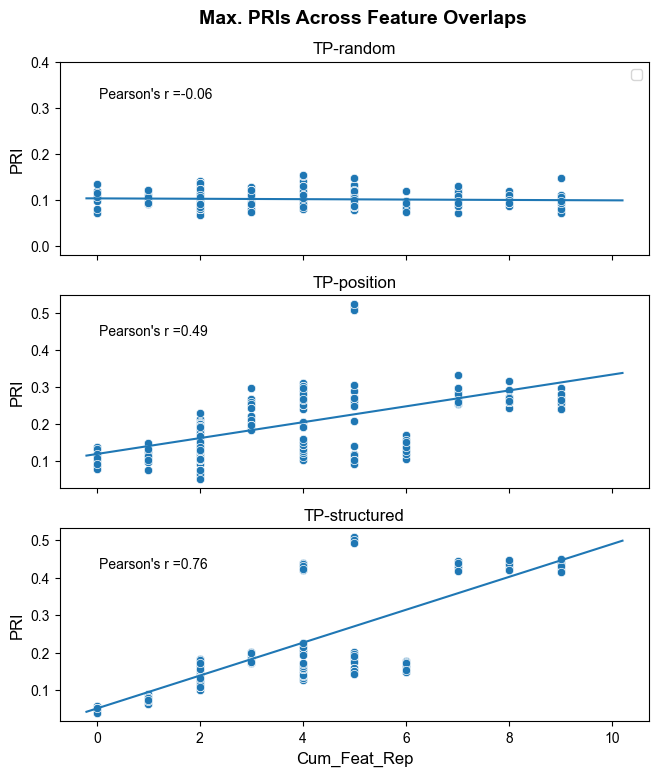

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    x_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max") & ((df["Control"] == "Reference lexicons (Literature)"))]["Cum_Feat_Rep"]
    y_data = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max") & ((df["Control"] == "Reference lexicons (Literature)"))]["PRI"]
    sns.scatterplot(data=df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max") & ((df["Control"] == "Reference lexicons (Literature)"))], x="Cum_Feat_Rep", y="PRI", ax=axs[i]) #, hue="Control") # & ((df["Control"] == "Reference lexicons (Literature)"))
    axs[i].set_title(f"{tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        #sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
    r, p = sp.stats.pearsonr(x=x_data, y=y_data)
    axs[i].text(.05, .8*axs[i].get_ylim()[1], "Pearson's r ={:.2f}".format(r), zorder=100)
    m, b = np.polyfit(x_data, y_data, 1)
    X_plot = np.linspace(-0.2,10.2,100)
    axs[i].plot(X_plot, m*X_plot + b, '-')
locs, labls = plt.xticks()
#plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"Max. PRIs Across Feature Overlaps", weight="bold", size=14, x=0.55)
plt.savefig("results/pri_corr_ref_only.pdf", dpi=600)